# **Exploratory Data Analysis**

This notebook is a visual demonstration of the data for this project.

# 0. Imports

In [1]:
import sys
from pathlib import Path

from kedro.framework.project import configure_project
from kedro.framework.session import KedroSession

import pandas as pd

import ydata_profiling

[06/18/25 15:08:41] INFO     Using                                                                  ]8;id=895942;file:///home/shadybea/anaconda3/envs/mlops/lib/python3.11/site-packages/kedro/framework/project/__init__.py\__init__.py]8;;\:]8;id=813247;file:///home/shadybea/anaconda3/envs/mlops/lib/python3.11/site-packages/kedro/framework/project/__init__.py#272\272]8;;\
                             '/home/shadybea/anaconda3/envs/mlops/lib/python3.11/site-packages/kedr                
                             o/framework/project/rich_logging.yml' as logging configuration.                       

<IPython.core.display.HTML object>

# 1. Project Loading

In [2]:
# Adjust path
sys.path.append(
    str(
        Path("..").resolve() / "src"
    )
)

In [3]:
# Configure project
configure_project("stock_project")

In [4]:
# Initialize kedro session
with KedroSession.create() as session:
    context = session.load_context()
    catalog = context.catalog
    df = catalog.load("ingested_data")

[06/18/25 15:08:45] WARNING  /home/shadybea/anaconda3/envs/mlops/lib/python3.11/site-packages/mlflo ]8;id=478697;file:///home/shadybea/anaconda3/envs/mlops/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=423784;file:///home/shadybea/anaconda3/envs/mlops/lib/python3.11/warnings.py#110\110]8;;\
                             w/pyfunc/utils/data_validation.py:186: UserWarning: [33mAdd type hints                
                             to the `predict` method to enable data validation and automatic                       
                             signature inference during model logging. Check                                       
                             https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage                
                             -in-pythonmodel for more details.[0m                                                  
                               color_warning(                                                                      
                                                                                                                   

                    INFO     Registering new custom resolver: 'km.random_name'                    ]8;id=882347;file:///home/shadybea/anaconda3/envs/mlops/lib/python3.11/site-packages/kedro_mlflow/framework/hooks/mlflow_hook.py\mlflow_hook.py]8;;\:]8;id=674668;file:///home/shadybea/anaconda3/envs/mlops/lib/python3.11/site-packages/kedro_mlflow/framework/hooks/mlflow_hook.py#65\65]8;;\

                    INFO     The 'tracking_uri' key in mlflow.yml is relative            ]8;id=220693;file:///home/shadybea/anaconda3/envs/mlops/lib/python3.11/site-packages/kedro_mlflow/config/kedro_mlflow_config.py\kedro_mlflow_config.py]8;;\:]8;id=265302;file:///home/shadybea/anaconda3/envs/mlops/lib/python3.11/site-packages/kedro_mlflow/config/kedro_mlflow_config.py#293\293]8;;\
                             ('server.mlflow_(tracking|registry)_uri = mlruns'). It is                             
                             converted to a valid uri:                                                             
                             'file:///home/shadybea/Documents/MLOps/stock-project/mlruns                           
                             '                                                                                     

                    INFO     Loading data from ingested_data (CSVDataset)...                    ]8;id=758349;file:///home/shadybea/anaconda3/envs/mlops/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=213192;file:///home/shadybea/anaconda3/envs/mlops/lib/python3.11/site-packages/kedro/io/data_catalog.py#403\403]8;;\

# 2. Data Exploration

In [5]:
# Check the data
df.head()

,Date,Close,High,Low,Open,Volume,Symbol
0,2000-01-03,35.726711,36.358873,34.328293,35.975745,53228400,MSFT
1,2000-01-04,34.519863,35.899125,34.404925,34.807209,54119000,MSFT
2,2000-01-05,34.883842,35.669256,33.523737,34.060116,64059600,MSFT
3,2000-01-06,33.715286,34.902984,33.217220,34.385761,54976600,MSFT
4,2000-01-07,34.155891,34.404925,32.891568,33.293853,62013600,MSFT


In [10]:
# Check missing values
df.isnull().sum()


Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
Symbol    0
dtype: int64

In [6]:
# Check datatypes
df.dtypes


Date       object
Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
Symbol     object
dtype: object

In [ ]:
# Fix datatypes
df['Date'] = pd.to_datetime(df['Date']).dt.date

In [11]:
# Set index
df.set_index(['Date', 'Symbol'], inplace=True)

In [19]:
# Check duplicates
df.duplicated().any()

False

In [16]:
profile = ydata_profiling.ProfileReport(
    df=df,
    title="Stock Data EDA",
    minimal=False,
    explorative=True
)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:00<00:00, 76.66it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.HTML object>

In [18]:
# Save EDA
profile.to_file("../data/08_reporting/eda_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

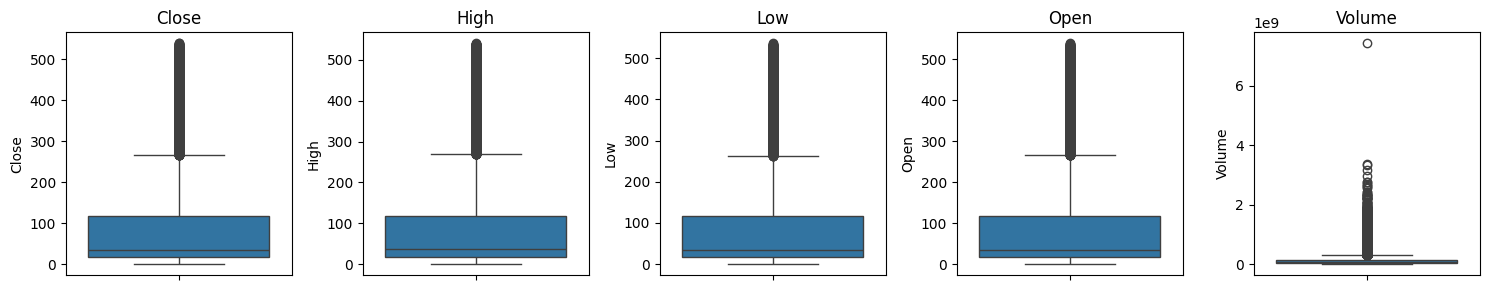

In [28]:
# Outliers
%matplotlib inline
cols = df.select_dtypes(include='number').columns
n_cols = 5
n_rows = (len(cols) + n_cols - 1) // n_cols  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(3 * n_cols, 3 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
